In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense, Flatten, Input
from keras.layers import Embedding, SpatialDropout1D
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
data_input = pd.ExcelFile('data training vector.xlsx').parse(0)
X_data = data_input.X.to_numpy()
y_train = data_input.y.to_numpy()
X = []
for i in range(0,len(X_data)):
    X.append(np.fromstring(X_data[i],sep=' '))
X_train = np.asarray(X)
X_train.shape

(24748, 12)

In [3]:
import pandas as pd
import numpy as np
data_input = pd.ExcelFile('data testing vector.xlsx').parse(0)
X_data = data_input.X.to_numpy()
y_test = data_input.y.to_numpy()
X = []
for i in range(0,len(X_data)):
    X.append(np.fromstring(X_data[i],sep=' '))
X_test = np.asarray(X)
X_test.shape

(6188, 12)

In [6]:
model = Sequential([
    
Input(shape=(12,)),
Dense(128,'relu'), # dense
Dense(128,'relu'), # dense
Dense(15,activation='softmax')  # dense
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 15)                1935      
Total params: 20,111
Trainable params: 20,111
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=150,batch_size=256, verbose=2)
scores = model.evaluate(X_test, y_test)

Epoch 1/150
97/97 - 2s - loss: 0.4493 - accuracy: 0.8194
Epoch 2/150
97/97 - 0s - loss: 0.4328 - accuracy: 0.8279
Epoch 3/150
97/97 - 0s - loss: 0.4279 - accuracy: 0.8289
Epoch 4/150
97/97 - 0s - loss: 0.4203 - accuracy: 0.8324
Epoch 5/150
97/97 - 0s - loss: 0.4180 - accuracy: 0.8342
Epoch 6/150
97/97 - 0s - loss: 0.4072 - accuracy: 0.8393
Epoch 7/150
97/97 - 0s - loss: 0.4159 - accuracy: 0.8301
Epoch 8/150
97/97 - 0s - loss: 0.4035 - accuracy: 0.8390
Epoch 9/150
97/97 - 0s - loss: 0.3997 - accuracy: 0.8393
Epoch 10/150
97/97 - 0s - loss: 0.4039 - accuracy: 0.8372
Epoch 11/150
97/97 - 0s - loss: 0.3988 - accuracy: 0.8389
Epoch 12/150
97/97 - 0s - loss: 0.3864 - accuracy: 0.8448
Epoch 13/150
97/97 - 0s - loss: 0.3813 - accuracy: 0.8479
Epoch 14/150
97/97 - 0s - loss: 0.3801 - accuracy: 0.8468
Epoch 15/150
97/97 - 0s - loss: 0.3775 - accuracy: 0.8474
Epoch 16/150
97/97 - 0s - loss: 0.3775 - accuracy: 0.8456
Epoch 17/150
97/97 - 0s - loss: 0.3750 - accuracy: 0.8469
Epoch 18/150
97/97 - 0s

Epoch 142/150
97/97 - 0s - loss: 0.1813 - accuracy: 0.9267
Epoch 143/150
97/97 - 0s - loss: 0.1812 - accuracy: 0.9263
Epoch 144/150
97/97 - 0s - loss: 0.1779 - accuracy: 0.9276
Epoch 145/150
97/97 - 0s - loss: 0.1770 - accuracy: 0.9273
Epoch 146/150
97/97 - 0s - loss: 0.1792 - accuracy: 0.9278
Epoch 147/150
97/97 - 0s - loss: 0.1761 - accuracy: 0.9291
Epoch 148/150
97/97 - 0s - loss: 0.1753 - accuracy: 0.9301
Epoch 149/150
97/97 - 0s - loss: 0.1757 - accuracy: 0.9286
Epoch 150/150
97/97 - 0s - loss: 0.1750 - accuracy: 0.9273
194/194 [==============================] - 1s 3ms/step - loss: 0.2024 - accuracy: 0.9187


In [10]:
print("Accuracy: %.2f%%" % (scores[1]*100))
# Menampilkan grafik accuracy dan validation accuracy

Accuracy: 91.87%


In [125]:
yhatS = []
for x in X_test:
    yhat = model.predict(np.expand_dims(x,0))
    yhatS.append(np.argsort(yhat[0])[-1])

In [126]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test,yhatS))

0.6303317535545023


In [127]:
precision_score(y_test,yhatS,average='macro')

0.4439827233954922

In [128]:
recall_score(y_test,yhatS,average='macro')

0.41700273410799726

In [129]:
f1_score(y_test,yhatS,average='macro')

0.40113239993837013

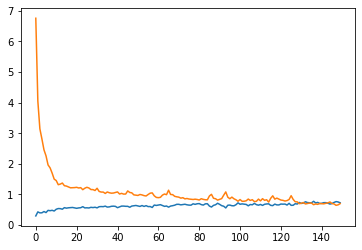

In [130]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

# Tampilkan grafik yang telah diplot
plt.show()